In [562]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [563]:
sns.set_style("white")
plt.style.use('gadfly')

# Pomen Slovencev v tujini za slovenski turizem

Število udeležencev v raziskavi: 167

Spodnje vizualizacije

In [564]:
fname = "/users/kriarm/project/slotour/data/slotour_resp.tsv"

df = pd.read_csv(fname, sep="\t", header=0)

# rename columns to shorter forms
new_cols = {'Koliko ljudem ste v zadnjih 12 mesecih predlagali potovanje v Slovenijo ali priporočili znamenitosti, aktivnosti, nastanitve, restavracije itd., ko so se že odločili za potovanje v Slovenijo in vas vprašali za priporočilo?': "n_rec",
            "Približno koliko ljudi je Slovenijo obiskalo zaradi vašega predloga, odkar ste prvič odšli v tujino? ": "n_incoming",
            "Kakšni so najpogostejši nameni obiska Slovenije tujcev, s katerimi ste se pogovarjali o njihovem potovanju v Slovenijo?": "purposes",
            "Obisk katerih regij jim najpogosteje predlagate?": "regions",
            'Kakšni so vaši predlogi za turistično manj znane lokacije (npr. Bled, Ljubljana in Piran so že na seznamu vsakega turista)?': "less_known",
            "Lahko delite z nami razloge, zakaj promovirate lepote Slovenije z vašo mrežo v tujini?": "why_promote",
            "V kateri/-h državi/-ah v tujini ste do sedaj živeli?": "countries",
            "Koliko let že prebivate ali ste prebivali v tujini?": "years_abroad",
            "Ali ste član/ica društva VTIS? ": "ismember",
            "Imate še kakšen dodaten komentar, idejo?": "comment"}

df = df.rename(columns=new_cols)

In [565]:
value_map1 = {"0": 0, "1-5": 1, "6-15": 2, "16-30": 3, "31+": 4}
df.n_rec = df.n_rec.replace(value_map1.keys(), value_map1.values())

value_map2 = {"0": 0, "1-10": 1, "11-30": 2, "31-50": 3, "51-100": 4, "101-200": 5, "200+": 6}
df.n_incoming = df.n_incoming.replace(value_map2.keys(), value_map2.values())

ismember_map = {"Redni član/-ica": "Član/-ica", "Izredni član/-ica": "Član/-ica"}
df.ismember = df.ismember.replace(ismember_map.keys(), ismember_map.values())

## 1. Koliko ljudem ste v zadnjih 12 mesecih predlagali potovanje v Slovenijo?

Polno izpisano vprašanje v anketi:  Koliko ljudem ste v zadnjih 12 mesecih predlagali potovanje v Slovenijo ali priporočili znamenitosti, aktivnosti, nastanitve, restavracije itd., ko so se že odločili za potovanje v Slovenijo in vas vprašali za priporočilo?  


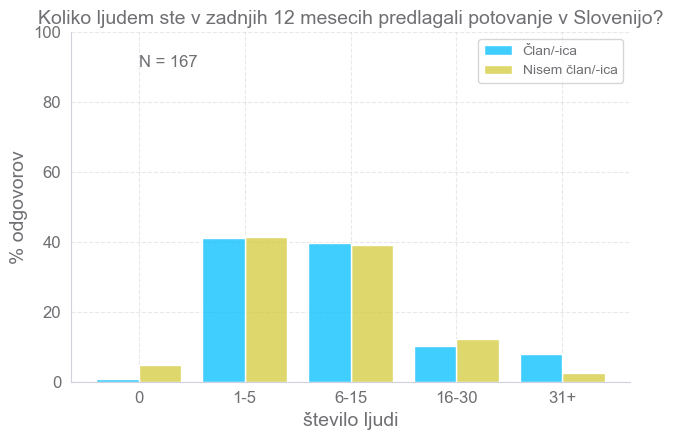

In [566]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 4.5))

ax = sns.histplot(df,
                  ax=ax,
                  x='n_rec',
                  hue='ismember',
                  discrete=True,
                  multiple='dodge',
                  shrink=0.8,
                  common_norm=False,
                  legend=True,
                  stat='percent',
                  edgecolor='w',
                  label="Test")

ax.set(ylabel="% odgovorov", xlabel="število ljudi")
ax.set_title(label="Koliko ljudem ste v zadnjih 12 mesecih predlagali potovanje v Slovenijo?",
             ha="center",
             fontsize=14)
ax.set_xticks(ticks=list(value_map1.values()), labels=value_map1.keys())
ax.set_ylim([0, 100])
ax.annotate(text=f"N = {len(df)}", xy=[ax.get_xlim()[0]*-0.01, 90], fontsize=12)
sns.move_legend(ax, loc='upper right', title="")
plt.tight_layout()
sns.despine()

plt.savefig("./fig/recs.png")

## 2. Približno koliko ljudi je Slovenijo obiskalo zaradi vašega predloga, odkar ste prvič odšli v tujino?

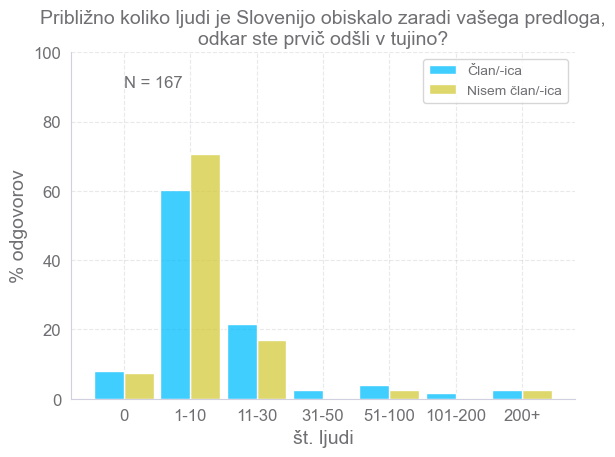

In [567]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 4.5))

sns.histplot(df, 
             ax=ax,
             x='n_incoming',
             hue='ismember',
             discrete=True,
             multiple='dodge',
             shrink=0.9,
             common_norm=False,
             legend=True,
             stat='percent',
             edgecolor='w')

ax.set(ylabel="% odgovorov",
       xlabel="št. ljudi")
ax.set_title(label="Približno koliko ljudi je Slovenijo obiskalo zaradi vašega predloga,\nodkar ste prvič odšli v tujino?",
             fontsize=14)
ax.set_xticks(ticks=list(value_map2.values()), labels=value_map2.keys())
ax.set_ylim([0, 100])
ax.annotate(text=f"N = {len(df)}", xy=[ax.get_xlim()[0]*-0.01, 90], fontsize=12)
sns.move_legend(ax, loc='upper right', title="")
sns.despine()
plt.savefig("./fig/obiski.png")

## 3. V kateri/-h državi/-ah v tujini ste do sedaj živeli?

Opombe: 
- nekateri udeleženci so navajali regije in ne države (e.g. Skandinavija). V tem primeru smo navajali regije (npr. odgovor "Norveška" smo šteli v odgovor "Skandinavija")
- histogram prikazuje le odgovore, ki so se v vzorcu pojavili več kot 2x

In [568]:
a = [e.split(", ") for e in df.countries.to_numpy()]
x = []
for e in a:
    x += e

In [569]:
scandinavia = ["Norveska", "Norveška", "Svedska", "Švedska", "Danska"]
typos = {
    "Grcija": "Grčija", 
    "Cile": "Čile", 
    "Urugay": "Urugvaj",
    "argentina": "Argentina",
    "srbija": "Srbija",
    "Nova zelandija": "Nova Zelandija",
        }

d = []
for e in x:
    e = e.strip()
    if e in typos.keys():
        e = typos[e]
    elif e in scandinavia:
        e = "Skandinavija"
    d.append(e)

In [570]:
df2 = pd.DataFrame(d, columns=["countries"]).groupby('countries').size().sort_values(ascending=False)
df2 = pd.DataFrame(df2, columns=["count"])

# count those with count <2
other = len(df2.loc[df2["count"] < 2, :])
other_list = df2.loc[df2["count"] < 2, :].index.tolist()

In [571]:
# only show contries with > 2 counts
df2 = df2.loc[df2["count"] > 2, :]
df2['countries'] = df2.index
df2 = pd.concat([df2, pd.DataFrame({"count": [other], "countries": ["drugo"]})]).sort_values(by="count", ascending=False)

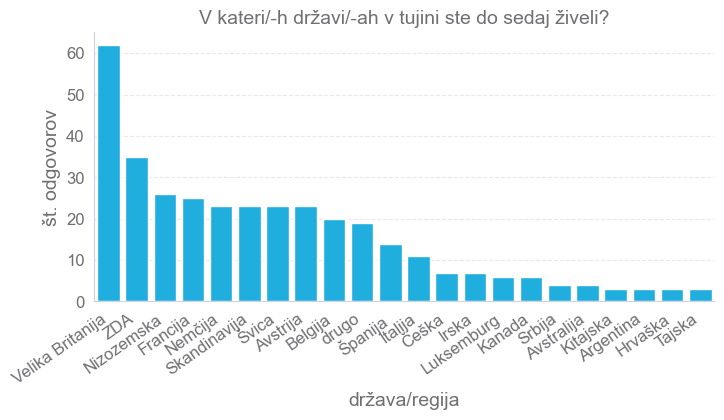

In [572]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3.5))
color1 = np.asarray([0, 190, 255])/255 #00BEFF
sns.barplot(df2, 
            ax=ax,
            x='countries',
            y='count',
            color=color1,
            edgecolor='w')

ax.set(ylabel="št. odgovorov", 
       xlabel="država/regija")
ax.set_title(label="V kateri/-h državi/-ah v tujini ste do sedaj živeli?", 
             fontsize=14)
ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=35, ha='right')
sns.despine()
plt.savefig("./fig/countries.png")

Kategorija "drugo" zajema odgovore:   

In [574]:
print(f"{', '.join(other_list)}")

vec drzav v Afriki, Tajvan, vec drzav na Bliznjem Vzhodu, Balkan, Urugvaj, Ukrajina, Čile, Ciper, Singapur, Rusija, Poljska, Brazilija, Nova Zelandija, Madžarska, Litva, Kenija, Grčija, Ghana, Peru


# 4. Lahko delite z nami razloge, zakaj promovirate lepote Slovenije z vašo mrežo v tujini?

In [575]:
options = [
    "Ponosen/-na sem na Slovenijo",
    "Prepričan/-a sem, da bo tujcem v Sloveniji všeč",
    "Želim pomagati slovenskemu turizmu",
    "Samo, če me tujci vprašajo za priporočilo, jim predlagam, kam lahko grejo v Sloveniji",
    "Ne promoviram potovanj v Slovenijo",
]

In [576]:
# first find all given options and add a full stop afterwards (instead of comma)
a = []
for s in df.why_promote.to_list():
    for o in options:
        s = s.replace(o, o + ".")
    a.append(s)

# now find the fullstop-comma combination and replace with just a comma
tmp = [e.replace(".,", ".") for e in a]


In [577]:
# now split at fullstop and count
b = [e.split(".") for e in tmp]
c = [e.strip() for b2 in b for e in b2]
c = [e for e in c if e != ""]

In [578]:
df3 = pd.DataFrame(c, columns=["why"]).groupby("why").size().sort_values(ascending=False)
df3 = pd.DataFrame(df3, columns=["count"])
df3['why'] = df3.index
df3 = df3.loc[df3["count"] > 1, :]

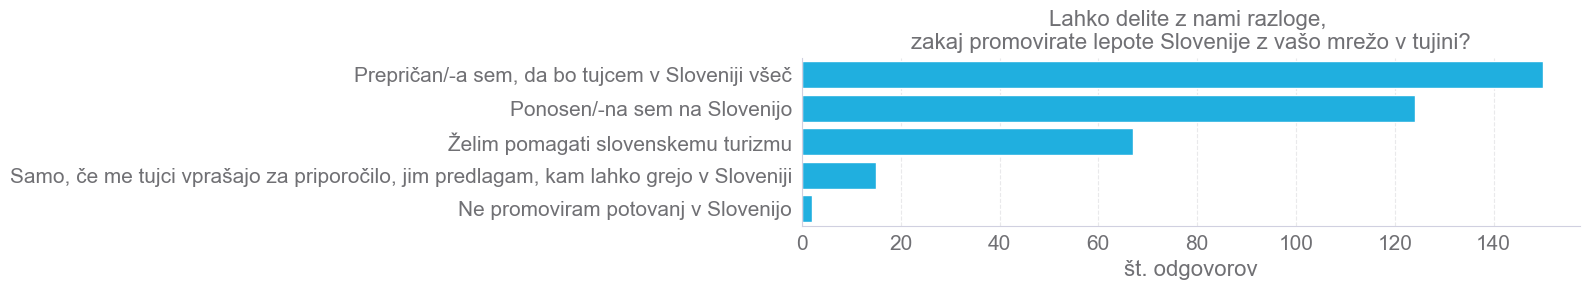

In [579]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 3))

sns.barplot(df3, 
            ax=ax,
            x='count',
            y='why',
            color=(0.00,0.75,1.00),
            edgecolor='w')

fs=16
ax.set_title(label="Lahko delite z nami razloge, \n" + \
                   "zakaj promovirate lepote Slovenije z vašo mrežo v tujini?",
             fontsize=fs) 
ax.set_ylabel(ylabel=""),
ax.set_xlabel(xlabel="št. odgovorov", fontsize=fs)
ax.tick_params(labelsize=15)
sns.despine()
plt.tight_layout()
plt.savefig("./fig/reasons.png")

# 5. Kakšni so vaši predlogi za turistično manj znane lokacije

work in progress ...

In [580]:
split_at = lambda x, mark: x.split(mark)
flatten_list = lambda l: [item for sublist in l for item in sublist]

In [581]:
t = flatten_list([s.split(", ") for s in df.less_known.tolist() if type(s) == str])

out1 = flatten_list(list(map(split_at, t, np.repeat("/", len(t)).tolist())))
out2 = flatten_list(list(map(split_at, out1, np.repeat(" in ", len(out1)).tolist())))

d = np.asarray([e.strip().lower() for e in out2])
d = np.unique(np.asarray(d))


In [582]:
mergethem = {

    "bohinjsko jezero": "bohinj",
    "bovec za rafting": "bovec",
    "center ljubljane": "ljubljana",
    "dolina reke soce: bovec": "bovec",
    "dolina soce": "dolina reke soče",
    "dolina soče": "dolina reke soče",
    "dolina soče (kobarid": "kobarid",
    "goriska brda ofc.": "goriška brda",
    "goriska brda": "goriška brda",

}

filterthem = [

    "etc.",
    "etc.)",
    "druge gorske destinacije",
    "ekoturizam",
    "gozd martuljek,kranjska gora ,soca",
    "grad",
    "gradovi",

]

addthem = [
    "gozd martuljek",
    "kranjska gora",
    "soča",
]